In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from prophet import Prophet
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import methods 
import sys
sys.path.append("..")
from methods.dataframe_methods import clean_columns

In [3]:
# Set column display options
pd.set_option("display.max_columns", None)

Global inflation 1970-2022

In [4]:
# Read the CSV file into a `pandas` DataFrame - Global Inflation Dataset (1970-2022)
inflation_file = "https://raw.githubusercontent.com/kkruel8100/Crime-Analysis/main/resources/Global%20Dataset%20of%20Inflation.csv"
inflation_df = pd.read_csv(inflation_file, encoding="ISO-8859-1", low_memory=False)

# Create a copy of the df
inflation_copy = inflation_df.copy()

# Clean the columns
cleaned_inflation_copy = clean_columns(inflation_copy)

# Display df head and info
display(cleaned_inflation_copy.head())
display(cleaned_inflation_copy.info())

,country_code,imf_country_code,country,indicator_type,series_name,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,note,unnamed:_59,unnamed:_60,unnamed:_61,unnamed:_62,unnamed:_63
0,ABW,314.0,Aruba,Inflation,Headline Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.20,3.00,1.88,2.28,4.05,2.89,3.32,3.66,2.53,3.40,3.61,5.39,8.96,-2.14,2.08,4.32,0.63,-2.37,0.42,0.48,-0.89,-0.47,3.58,4.26,1.22,0.74,6.04,Annual average inflation,NaN,NaN,NaN,NaN,NaN
1,AFG,512.0,Afghanistan,Inflation,Headline Consumer Price Inflation,25.51,25.51,-12.52,-10.68,10.23,11.85,0.60,7.65,5.00,9.90,13.40,22.20,18.20,15.90,20.40,8.70,-2.10,18.40,27.50,71.50,47.40,43.80,58.19,33.99,20.01,14.00,14.01,14.01,14.01,14.01,0.00,-43.40,51.93,35.66,16.36,10.57,6.78,8.68,26.42,-6.81,2.18,11.80,6.44,7.39,4.67,-0.66,4.38,4.98,0.63,2.30,5.44,5.06,NaN,Annual average inflation,NaN,NaN,NaN,NaN,NaN
2,AGO,614.0,Angola,Inflation,Headline Consumer Price Inflation,7.97,5.78,15.80,15.67,27.42,29.00,80.70,69.01,48.46,101.30,46.71,1.39,1.83,1.83,1.83,1.83,1.83,1.83,1.83,1.83,1.83,85.26,299.10,1379.48,949.77,2672.23,4146.01,221.49,107.43,248.25,325.03,152.59,108.89,98.22,43.53,22.96,13.31,12.25,12.47,13.72,14.48,13.48,10.28,8.78,7.30,9.16,32.38,29.84,19.63,17.08,21.02,23.85,21.35,Annual average inflation,NaN,NaN,NaN,NaN,NaN
3,ALB,914.0,Albania,Inflation,Headline Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.18,35.72,226.00,85.00,22.57,7.75,12.80,33.21,20.55,0.40,0.03,3.10,5.18,2.38,2.83,2.36,2.41,2.91,3.41,2.29,3.57,3.41,2.03,1.93,1.62,1.91,1.29,1.99,2.03,1.41,1.62,2.04,6.73,Annual average inflation,NaN,NaN,NaN,NaN,NaN
4,ARE,466.0,United Arab Emirates,Inflation,Headline Consumer Price Inflation,21.98,21.98,21.98,21.98,21.98,21.98,21.98,21.97,13.04,10.99,10.07,7.95,7.08,1.30,2.43,3.50,5.43,5.50,4.99,2.79,0.60,3.40,6.38,5.27,5.70,4.33,2.98,2.97,1.99,2.10,1.35,2.80,2.92,3.12,5.04,6.20,9.28,11.13,12.27,1.57,0.88,0.88,0.66,1.09,2.34,4.07,1.62,1.97,3.06,-1.93,-2.08,0.18,5.22,Annual average inflation,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country_code      783 non-null    object 
 1   imf_country_code  781 non-null    float64
 2   country           783 non-null    object 
 3   indicator_type    783 non-null    object 
 4   series_name       783 non-null    object 
 5   1970              422 non-null    float64
 6   1971              428 non-null    float64
 7   1972              430 non-null    float64
 8   1973              430 non-null    float64
 9   1974              434 non-null    float64
 10  1975              434 non-null    float64
 11  1976              430 non-null    float64
 12  1977              427 non-null    float64
 13  1978              428 non-null    float64
 14  1979              428 non-null    float64
 15  1980              433 non-null    float64
 16  1981              451 non-null    float64
 1

None

In [5]:
# Sort values and display tail
cleaned_inflation_copy.sort_values("country", inplace=True)
cleaned_inflation_copy.tail(50)

,country_code,imf_country_code,country,indicator_type,series_name,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,note,unnamed:_59,unnamed:_60,unnamed:_61,unnamed:_62,unnamed:_63
540,UGA,746.0,Uganda,Inflation,Food Consumer Price Inflation,13.200000,24.70,-5.50,18.60,75.50,23.50,62.00,79.50,NaN,NaN,NaN,NaN,NaN,38.50,41.80,174.80,128.40,197.00,197.10,NaN,19.20,23.90,65.30,-4.00,15.90,4.60,6.60,18.10,-2.00,6.90,1.00,-0.66,3.24,-0.21,-3.07,-6.87,5.94,2.66,19.85,25.25,2.66,29.26,13.61,2.25,3.82,7.43,5.53,10.10,-1.19,-0.20,1.76,0.67,12.64,Food and non-acoholic beverage,NaN,NaN,NaN,NaN,NaN
541,UKR,926.0,Ukraine,Inflation,Food Consumer Price Inflation,0.000000,0.40,0.20,0.10,0.50,0.10,-0.10,0.00,1.10,0.60,0.90,1.20,2.90,1.00,-0.20,1.80,4.70,4.70,-0.10,0.60,NaN,NaN,NaN,5414.10,799.20,355.90,58.30,11.60,11.80,27.80,34.50,14.40,0.00,6.20,11.30,16.60,5.31,9.64,35.68,11.94,10.88,6.42,-2.13,-2.16,12.05,45.92,8.96,12.88,11.15,8.00,2.74,10.79,25.26,Food and non-acoholic beverage,NaN,NaN,NaN,NaN,NaN
180,UKR,926.0,Ukraine,Inflation,Headline Consumer Price Inflation,0.200000,-0.20,-0.10,0.00,0.10,0.10,0.00,0.40,0.80,1.10,1.30,1.00,2.80,0.70,-0.90,0.30,1.50,1.50,-0.10,2.20,2.20,2.20,2.20,4660.58,861.05,376.02,77.82,15.62,10.66,22.83,28.26,11.91,0.72,5.22,9.03,13.53,9.09,12.89,25.20,15.86,9.33,7.95,0.59,-0.23,12.15,48.57,13.95,14.44,10.94,7.89,2.73,9.36,20.18,Annual average inflation,NaN,NaN,NaN,NaN,NaN
361,UKR,926.0,Ukraine,Inflation,Energy Consumer Price Inflation,35.050000,35.05,35.05,35.05,89.00,73.40,61.40,54.70,32.00,55.50,60.80,17.60,19.30,74.70,62.60,72.20,60.60,65.06,67.15,82.75,105.85,101.10,73.77,61.73,55.82,45.39,33.33,22.88,12.55,6.48,4.57,4.07,11.41,20.79,9.56,6.14,8.13,8.86,11.16,10.70,8.85,10.32,9.24,10.70,9.03,8.11,9.20,8.58,6.06,5.91,-2.98,23.16,5.01,"Housing, Water, Electricity, Gas & Other Fuel",NaN,NaN,NaN,NaN,NaN
774,UKR,926.0,Ukraine,Inflation,Producer Price Inflation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14400.00,1140.00,488.10,51.83,7.67,13.20,31.13,20.86,8.65,3.05,7.71,20.32,16.71,9.49,19.48,35.56,6.59,20.88,19.00,3.65,-0.05,17.17,35.69,20.92,26.45,17.58,4.14,-1.88,40.82,61.05,"Producer Price Index, All Commodities",NaN,NaN,NaN,NaN,NaN
663,UKR,926.0,Ukraine,Inflation,Official Core Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.41,8.59,7.70,3.32,0.23,9.86,40.39,11.00,7.33,9.09,6.77,3.30,6.87,14.62,All Items Excluding Food and Energy,NaN,NaN,NaN,NaN,NaN
379,ARE,466.0,United Arab Emirates,Inflation,Food Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.50,0.79,4.45,5.86,5.24,2.69,2.17,1.24,1.01,1.20,3.54,-1.39,3.70,0.00,NaN,Food and non-acoholic beverage,NaN,NaN,NaN,NaN,NaN
206,ARE,466.0,United Arab Emirates,Inflation,Energy Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.17,0.45,-0.30,-2.42,-2.58,0.25,3.12,8.81,3.56,0.87,-3.09,-5.20,-3.67,-3.65,NaN,Energy,NaN,NaN,NaN,NaN,NaN
4,ARE,466.0,United Arab Emirates,Inflation,Headline Consumer Price Inflation,21.980000,21.98,21.98,21.98,21.98,21.98,21.98,21.97,13.04,10.99,10.07,7.95,7.08,1.30,2.43,3.50,5.43,5.50,4.99,2.79,0.60,3.40,6.38,5.27,5.70,4.33,2.98,2.97,1.99,2.10,1.35,2.80,2.92,3.12,5.04,6.20,9.28,11.13,12.27,1.57,0.88,0.88,0.66,1.09,2.34,4.07,1.62,1.97,3.06,-1.93,-2.08,0.18,5.22,Annual average inflation,NaN,NaN,NaN,NaN,NaN
62,GBR,112.0,United Kingdom,Inflation,Headline Consumer Price Inflation,6.370000,9.44,7.07,9.20,

In [6]:
# Create US inflation df and display
inflation_us = cleaned_inflation_copy.loc[cleaned_inflation_copy["country_code"] == "USA"].reset_index(drop=True)
inflation_us

,country_code,imf_country_code,country,indicator_type,series_name,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,note,unnamed:_59,unnamed:_60,unnamed:_61,unnamed:_62,unnamed:_63
0,USA,111.0,United States,Inflation,Official Core Consumer Price Inflation,6.245934,4.69,3.06,3.48,8.24,9.22,6.57,6.25,7.31,9.74,12.42,10.47,7.40,3.93,4.94,4.38,4.04,4.12,4.41,4.50,5.03,4.91,3.66,3.30,2.85,2.99,2.70,2.39,2.29,2.08,2.43,2.67,2.32,1.46,1.76,2.17,2.50,2.34,2.30,1.70,0.96,1.66,2.11,1.76,1.75,1.83,2.21,1.84,2.14,2.19,1.70,3.57,6.22,All Items Excluding Food and Energy,NaN,NaN,NaN,NaN,NaN
1,USA,111.0,United States,Inflation,Producer Price Inflation,3.610000,3.33,4.41,13.14,18.81,9.25,4.65,6.13,7.77,12.54,14.13,9.13,2.01,1.26,2.38,-0.43,-2.89,2.64,4.02,4.96,3.56,0.22,0.59,1.46,1.30,3.58,2.34,-0.07,-2.48,0.84,5.78,1.11,-2.29,5.35,6.18,7.32,4.67,4.80,9.81,-8.84,4.48,3.87,1.86,1.36,1.58,-0.87,0.42,2.33,2.90,1.69,-2.12,8.95,7.91,"Producer Price Index, All Commodities",NaN,NaN,NaN,NaN,NaN
2,USA,111.0,United States,Inflation,Food Consumer Price Inflation,5.400000,3.07,4.13,13.29,13.76,8.44,3.09,5.96,9.77,10.71,8.56,7.77,4.07,2.23,3.76,2.33,3.26,4.07,4.13,5.67,5.76,3.56,1.38,2.09,2.32,2.76,3.25,2.62,2.12,2.15,2.31,3.09,1.84,2.14,3.37,2.43,2.35,3.91,5.37,1.88,0.79,3.58,2.55,1.41,2.31,1.80,0.34,0.88,1.40,0.89,3.51,3.47,11.35,Food and non-acoholic beverage,NaN,NaN,NaN,NaN,NaN
3,USA,111.0,United States,Inflation,Headline Consumer Price Inflation,5.900000,4.29,3.27,6.18,11.05,9.14,5.74,6.50,7.63,11.25,13.55,10.33,6.13,3.21,4.30,3.55,1.90,3.66,4.08,4.83,5.40,4.23,3.03,2.95,2.61,2.81,2.93,2.34,1.55,2.19,3.38,2.83,1.59,2.27,2.68,3.39,3.23,2.85,3.84,-0.36,1.64,3.16,2.07,1.46,1.62,0.12,1.26,2.14,2.44,1.81,1.23,4.70,8.00,Annual average inflation,NaN,NaN,NaN,NaN,NaN
4,USA,111.0,United States,Inflation,Energy Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.97,2.33,16.90,7.10,25.60,21.27,2.59,21.01,27.12,"Housing, Water, Electricity, Gas & Other Fuel",NaN,NaN,NaN,NaN,NaN


In [7]:
 # Display df info
inflation_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country_code      5 non-null      object 
 1   imf_country_code  5 non-null      float64
 2   country           5 non-null      object 
 3   indicator_type    5 non-null      object 
 4   series_name       5 non-null      object 
 5   1970              4 non-null      float64
 6   1971              4 non-null      float64
 7   1972              4 non-null      float64
 8   1973              4 non-null      float64
 9   1974              4 non-null      float64
 10  1975              4 non-null      float64
 11  1976              4 non-null      float64
 12  1977              4 non-null      float64
 13  1978              4 non-null      float64
 14  1979              4 non-null      float64
 15  1980              4 non-null      float64
 16  1981              4 non-null      float64
 17  1

In [8]:
# Drop unneeded columns & rows
inflation_us = inflation_us.iloc[0:4,4:58]

# Display df
inflation_us

,series_name,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Official Core Consumer Price Inflation,6.245934,4.69,3.06,3.48,8.24,9.22,6.57,6.25,7.31,9.74,12.42,10.47,7.40,3.93,4.94,4.38,4.04,4.12,4.41,4.50,5.03,4.91,3.66,3.30,2.85,2.99,2.70,2.39,2.29,2.08,2.43,2.67,2.32,1.46,1.76,2.17,2.50,2.34,2.30,1.70,0.96,1.66,2.11,1.76,1.75,1.83,2.21,1.84,2.14,2.19,1.70,3.57,6.22
1,Producer Price Inflation,3.610000,3.33,4.41,13.14,18.81,9.25,4.65,6.13,7.77,12.54,14.13,9.13,2.01,1.26,2.38,-0.43,-2.89,2.64,4.02,4.96,3.56,0.22,0.59,1.46,1.30,3.58,2.34,-0.07,-2.48,0.84,5.78,1.11,-2.29,5.35,6.18,7.32,4.67,4.80,9.81,-8.84,4.48,3.87,1.86,1.36,1.58,-0.87,0.42,2.33,2.90,1.69,-2.12,8.95,7.91
2,Food Consumer Price Inflation,5.400000,3.07,4.13,13.29,13.76,8.44,3.09,5.96,9.77,10.71,8.56,7.77,4.07,2.23,3.76,2.33,3.26,4.07,4.13,5.67,5.76,3.56,1.38,2.09,2.32,2.76,3.25,2.62,2.12,2.15,2.31,3.09,1.84,2.14,3.37,2.43,2.35,3.91,5.37,1.88,0.79,3.58,2.55,1.41,2.31,1.80,0.34,0.88,1.40,0.89,3.51,3.47,11.35
3,Headline Consumer Price Inflation,5.900000,4.29,3.27,6.18,11.05,9.14,5.74,6.50,7.63,11.25,13.55,10.33,6.13,3.21,4.30,3.55,1.90,3.66,4.08,4.83,5.40,4.23,3.03,2.95,2.61,2.81,2.93,2.34,1.55,2.19,3.38,2.83,1.59,2.27,2.68,3.39,3.23,2.85,3.84,-0.36,1.64,3.16,2.07,1.46,1.62,0.12,1.26,2.14,2.44,1.81,1.23,4.70,8.00


In [9]:
# Create US inflation melt
inflation_us_melt = pd.melt(inflation_us, id_vars=["series_name"], var_name="year", value_name="inflation_rate")
inflation_us_melt
    

,series_name,year,inflation_rate
0,Official Core Consumer Price Inflation,1970,6.245934
1,Producer Price Inflation,1970,3.610000
2,Food Consumer Price Inflation,1970,5.400000
3,Headline Consumer Price Inflation,1970,5.900000
4,Official Core Consumer Price Inflation,1971,4.690000
...,...,...,...
207,Headline Consumer Price Inflation,2021,4.700000
208,Official Core Consumer Price Inflation,2022,6.220000
209,Producer Price Inflation,2022,7.910000
210,Food Consumer Price Inflation,2022,11.350000


In [10]:
# Create US inflation pivot table
inflation_us_pivot = inflation_us_melt.pivot_table(index="year", columns="series_name", values="inflation_rate")
    
# Display head and tail
display(inflation_us_pivot.head())
display(inflation_us_pivot.tail())

series_name,Food Consumer Price Inflation,Headline Consumer Price Inflation,Official Core Consumer Price Inflation,Producer Price Inflation
year,,,,
1970,5.40,5.90,6.245934,3.61
1971,3.07,4.29,4.690000,3.33
1972,4.13,3.27,3.060000,4.41
1973,13.29,6.18,3.480000,13.14
1974,13.76,11.05,8.240000,18.81


series_name,Food Consumer Price Inflation,Headline Consumer Price Inflation,Official Core Consumer Price Inflation,Producer Price Inflation
year,,,,
2018,1.40,2.44,2.14,2.90
2019,0.89,1.81,2.19,1.69
2020,3.51,1.23,1.70,-2.12
2021,3.47,4.70,3.57,8.95
2022,11.35,8.00,6.22,7.91


In [35]:
# Create US inflation plot
inflation_us_plot =  inflation_us_pivot.hvplot.line(
    x="year",
    y=inflation_us_pivot.columns,
    xlabel="Year",
    ylabel="Inflation Rate",
    title="US Inflation Rates",
    rot=45,
    width=1200
)

# Display plot
inflation_us_plot

:NdOverlay   [series_name]
   :Curve   [year]   (value)

Prophet modeling

In [12]:
# Show inflation info
inflation_us_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 1970 to 2022
Data columns (total 4 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Food Consumer Price Inflation           53 non-null     float64
 1   Headline Consumer Price Inflation       53 non-null     float64
 2   Official Core Consumer Price Inflation  53 non-null     float64
 3   Producer Price Inflation                53 non-null     float64
dtypes: float64(4)
memory usage: 2.1+ KB


In [13]:
# Create new dataframe from core consumer price inflation
inflation_trends = inflation_us_pivot["Official Core Consumer Price Inflation"].to_frame()

# Display head and tail
display(inflation_trends.head())
display(inflation_trends.tail())

,Official Core Consumer Price Inflation
year,
1970,6.245934
1971,4.690000
1972,3.060000
1973,3.480000
1974,8.240000


,Official Core Consumer Price Inflation
year,
2018,2.14
2019,2.19
2020,1.70
2021,3.57
2022,6.22


In [14]:
# Reset the index
inflation_trends.reset_index(inplace=True)

# Label the columns for Prophet
inflation_trends.columns = ["ds", "y"]

# Display dtype
inflation_trends.dtypes

ds     object
y     float64
dtype: object

In [15]:
# Tranlate year object to date time using last day of year for year data
inflation_trends["ds"] = pd.to_datetime(inflation_trends["ds"])

# Display dtype
inflation_trends.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [16]:
# Adjust date to last day of year
inflation_trends["ds"] = inflation_trends["ds"].apply(lambda x: x.replace(month=12, day=31))

# Display head and tail
display(inflation_trends.head())
display(inflation_trends.tail())

,ds,y
0,1970-12-31,6.245934
1,1971-12-31,4.690000
2,1972-12-31,3.060000
3,1973-12-31,3.480000
4,1974-12-31,8.240000


,ds,y
48,2018-12-31,2.14
49,2019-12-31,2.19
50,2020-12-31,1.70
51,2021-12-31,3.57
52,2022-12-31,6.22


In [17]:
# Show trends
inflation_trends

,ds,y
0,1970-12-31,6.245934
1,1971-12-31,4.690000
2,1972-12-31,3.060000
3,1973-12-31,3.480000
4,1974-12-31,8.240000
5,1975-12-31,9.220000
6,1976-12-31,6.570000
7,1977-12-31,6.250000
8,1978-12-31,7.310000
9,1979-12-31,9.740000


In [18]:
# Call the Prophet function, store as an object
inflation_m = Prophet()
inflation_m

In [19]:
# Fit the time-series model.
inflation_m.fit(inflation_trends)

14:45:28 - cmdstanpy - INFO - Chain [1] start processing
14:45:28 - cmdstanpy - INFO - Chain [1] done processing


In [20]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 20 years
future_inflation_trends = inflation_m.make_future_dataframe(periods=20, freq="Y")

# View the last five rows of the future_inflation_trends DataFrame
future_inflation_trends.tail()

,ds
68,2038-12-31
69,2039-12-31
70,2040-12-31
71,2041-12-31
72,2042-12-31


In [21]:
# Make the predictions for the trend data using the future_inflation_trends DataFrame
forecast_inflation_trends = inflation_m.predict(future_inflation_trends)

# Display the head and tail of forecast_inflation_trends DataFrame
display(forecast_inflation_trends.head())
display(forecast_inflation_trends.tail())

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1970-12-31,-1.572372,4.444793,9.212907,-1.572372,-1.572372,8.435798,8.435798,8.435798,8.435798,8.435798,8.435798,0.0,0.0,0.0,6.863426
1,1971-12-31,-1.682836,4.244908,9.088629,-1.682836,-1.682836,8.425420,8.425420,8.425420,8.425420,8.425420,8.425420,0.0,0.0,0.0,6.742584
2,1972-12-31,-1.793604,4.121982,8.840456,-1.793604,-1.793604,8.339314,8.339314,8.339314,8.339314,8.339314,8.339314,0.0,0.0,0.0,6.545711
3,1973-12-31,-1.904068,4.129622,8.890842,-1.904068,-1.904068,8.407082,8.407082,8.407082,8.407082,8.407082,8.407082,0.0,0.0,0.0,6.503014
4,1974-12-31,-2.014533,4.088821,8.902904,-2.014533,-2.014533,8.435798,8.435798,8.435798,8.435798,8.435798,8.435798,0.0,0.0,0.0,6.421265


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
68,2038-12-31,-9.089033,-2.948639,1.836572,-9.089037,-9.089029,8.435798,8.435798,8.435798,8.435798,8.435798,8.435798,0.0,0.0,0.0,-0.653236
69,2039-12-31,-9.199496,-3.154430,1.706589,-9.199500,-9.199491,8.425420,8.425420,8.425420,8.425420,8.425420,8.425420,0.0,0.0,0.0,-0.774076
70,2040-12-31,-9.310261,-3.406085,1.628350,-9.310265,-9.310256,8.339314,8.339314,8.339314,8.339314,8.339314,8.339314,0.0,0.0,0.0,-0.970946
71,2041-12-31,-9.420723,-3.434694,1.299129,-9.420728,-9.420718,8.407082,8.407082,8.407082,8.407082,8.407082,8.407082,0.0,0.0,0.0,-1.013641
72,2042-12-31,-9.531185,-3.518435,1.396941,-9.531191,-9.531180,8.435798,8.435798,8.435798,8.435798,8.435798,8.435798,0.0,0.0,0.0,-1.095388


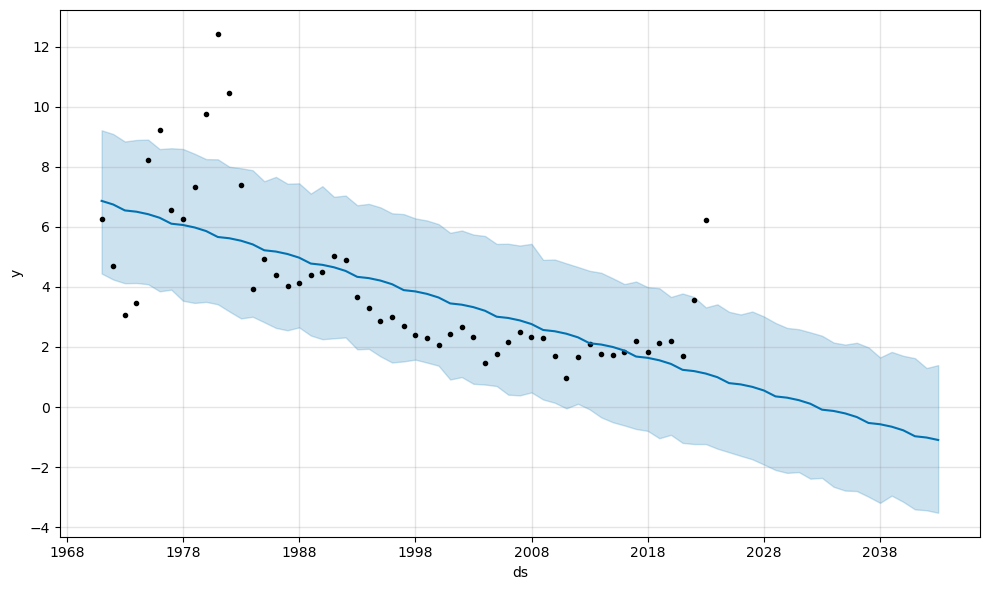

In [22]:
# Plot the Prophet predictions for the inflation trends data

# Added ; to prevent 2 plots from displaying

inflation_m.plot(forecast_inflation_trends);

In [23]:
# Show inflation trends
inflation_trends

,ds,y
0,1970-12-31,6.245934
1,1971-12-31,4.690000
2,1972-12-31,3.060000
3,1973-12-31,3.480000
4,1974-12-31,8.240000
5,1975-12-31,9.220000
6,1976-12-31,6.570000
7,1977-12-31,6.250000
8,1978-12-31,7.310000
9,1979-12-31,9.740000


In [24]:
# Create trends for last 30 years
inflation_trends_30 = inflation_trends.iloc[22:,:]

# Display trends
inflation_trends_30

,ds,y
22,1992-12-31,3.66
23,1993-12-31,3.30
24,1994-12-31,2.85
25,1995-12-31,2.99
26,1996-12-31,2.70
27,1997-12-31,2.39
28,1998-12-31,2.29
29,1999-12-31,2.08
30,2000-12-31,2.43
31,2001-12-31,2.67


In [25]:
# Call the Prophet function, store as an object
inflation_30_m = Prophet()
inflation_30_m

In [26]:
# Fit the time-series model.
inflation_30_m.fit(inflation_trends_30)

14:45:28 - cmdstanpy - INFO - Chain [1] start processing
14:45:28 - cmdstanpy - INFO - Chain [1] done processing


In [27]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 20 years
future_inflation_trends_30 = inflation_30_m.make_future_dataframe(periods=20, freq="Y")

# View the last five rows of the future_inflation_trends DataFrame
future_inflation_trends_30.tail()

,ds
46,2038-12-31
47,2039-12-31
48,2040-12-31
49,2041-12-31
50,2042-12-31


In [28]:
# Make the predictions for the trend data using the future_inflation_trends DataFrame
forecast_inflation_trends_30 = inflation_30_m.predict(future_inflation_trends_30)

# Display the head and tail of forecast_inflation_trends DataFrame
display(forecast_inflation_trends_30.head())
display(forecast_inflation_trends_30.tail())

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-12-31,-1.658208,1.330641,3.675040,-1.658208,-1.658208,4.158067,4.158067,4.158067,4.158067,4.158067,4.158067,0.0,0.0,0.0,2.499859
1,1993-12-31,-1.662056,1.353445,3.588149,-1.662056,-1.662056,4.141930,4.141930,4.141930,4.141930,4.141930,4.141930,0.0,0.0,0.0,2.479874
2,1994-12-31,-1.665903,1.291660,3.572188,-1.665903,-1.665903,4.087358,4.087358,4.087358,4.087358,4.087358,4.087358,0.0,0.0,0.0,2.421455
3,1995-12-31,-1.669751,1.200459,3.445058,-1.669751,-1.669751,3.994415,3.994415,3.994415,3.994415,3.994415,3.994415,0.0,0.0,0.0,2.324665
4,1996-12-31,-1.673609,1.388486,3.646323,-1.673609,-1.673609,4.158067,4.158067,4.158067,4.158067,4.158067,4.158067,0.0,0.0,0.0,2.484459


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
46,2038-12-31,-1.835279,1.093245,3.345927,-1.835281,-1.835277,4.087358,4.087358,4.087358,4.087358,4.087358,4.087358,0.0,0.0,0.0,2.252079
47,2039-12-31,-1.839126,1.071142,3.342763,-1.839128,-1.839123,3.994415,3.994415,3.994415,3.994415,3.994415,3.994415,0.0,0.0,0.0,2.155290
48,2040-12-31,-1.842983,1.192091,3.539595,-1.842985,-1.842980,4.158067,4.158067,4.158067,4.158067,4.158067,4.158067,0.0,0.0,0.0,2.315085
49,2041-12-31,-1.846829,1.085276,3.410596,-1.846832,-1.846826,4.141930,4.141930,4.141930,4.141930,4.141930,4.141930,0.0,0.0,0.0,2.295101
50,2042-12-31,-1.850676,1.110937,3.414892,-1.850679,-1.850673,4.087358,4.087358,4.087358,4.087358,4.087358,4.087358,0.0,0.0,0.0,2.236682


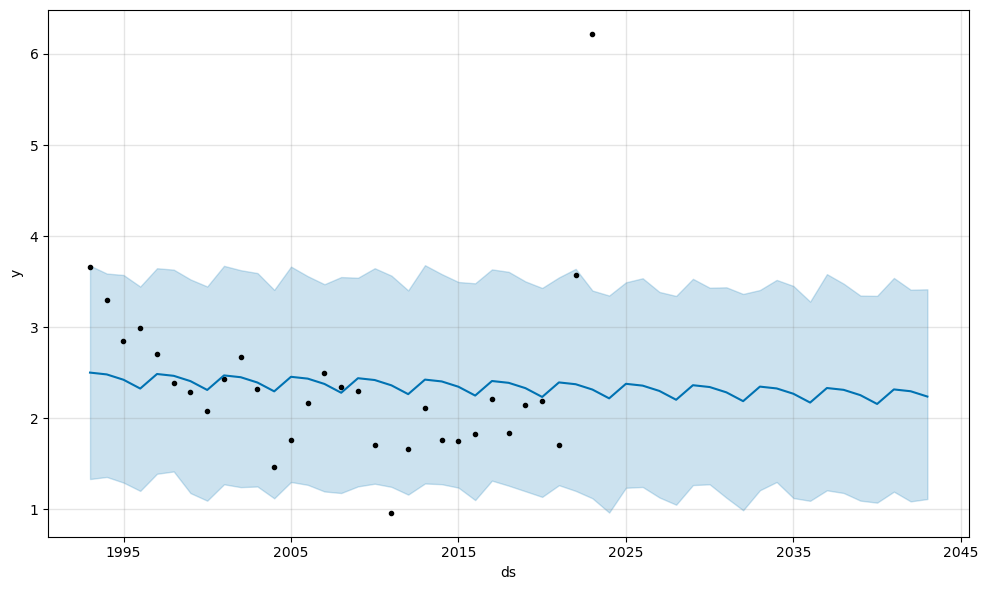

In [29]:
# Plot the Prophet predictions for the inflation trends data

# Added ; to prevent 2 plots from displaying

inflation_30_m.plot(forecast_inflation_trends_30);

Simple Model

In [30]:
inflation_trends

,ds,y
0,1970-12-31,6.245934
1,1971-12-31,4.690000
2,1972-12-31,3.060000
3,1973-12-31,3.480000
4,1974-12-31,8.240000
5,1975-12-31,9.220000
6,1976-12-31,6.570000
7,1977-12-31,6.250000
8,1978-12-31,7.310000
9,1979-12-31,9.740000


In [31]:
simple_model_inflation = inflation_trends.copy()
simple_model_inflation.rename(columns={"ds": "year", "y": "inflation"}, inplace=True)
simple_model_inflation.set_index("year", inplace=True)
simple_model_inflation

,inflation
year,
1970-12-31,6.245934
1971-12-31,4.690000
1972-12-31,3.060000
1973-12-31,3.480000
1974-12-31,8.240000
1975-12-31,9.220000
1976-12-31,6.570000
1977-12-31,6.250000
1978-12-31,7.310000


In [32]:
inflation = simple_model_inflation["inflation"]
train = inflation.iloc[:-10]
test = inflation.iloc[-10:]

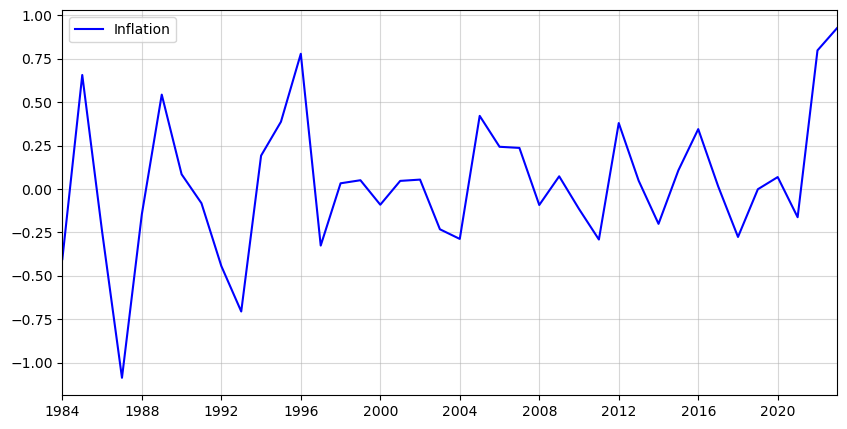

In [33]:
rooted = np.sqrt(inflation)
diffed = rooted.diff(1)
diffed_s = diffed.diff(12).dropna()
plt.figure(figsize=(10,5))
plt.plot(diffed_s,color="blue",label="Inflation")
plt.legend()
plt.margins(x=0)
plt.grid(alpha=0.5)

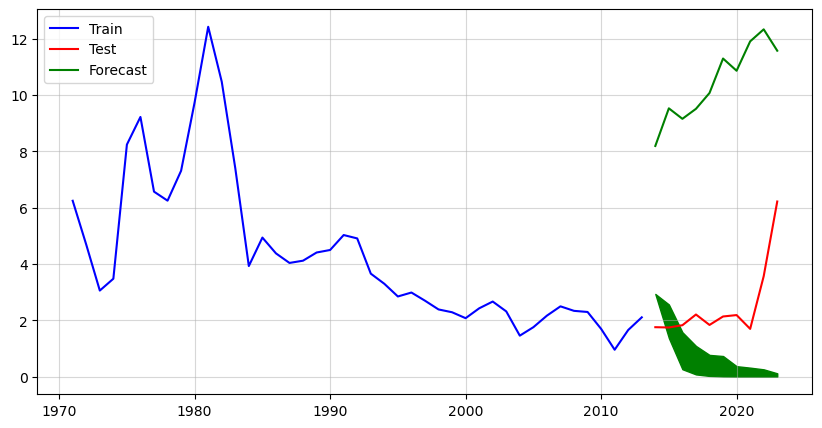

In [34]:
full_sample = []
np.random.seed(50)
for i in range(10000):
    draw = np.random.choice(diffed_s, len(test))
    result = list(diffed.iloc[-12:].values)
    for t in range(len(test)):
        result.append(draw[t] + result[t])
    full_sample.append(np.array(((rooted.iloc[-1])+np.cumsum(result[12:]))**2).reshape(-1,1))
    
reshaped = np.concatenate(full_sample, 1)
result_mean = np.mean(reshaped, 1)
lower_bound = np.percentile(reshaped, 0.05, 1)
upper_bound = np.percentile(reshaped, 0.95, 1)
plt.figure(figsize=(10,5))  
plt.plot(train, color="blue", label="Train")
plt.plot(test, color="red", label="Test")
plt.grid(alpha=0.5)
plt.plot(test.index, result_mean, color="green", label="Forecast")   
plt.legend()
plt.fill_between(test.index, lower_bound, upper_bound, color="green")

    